# Work 5. Ethereum

### 0. Importing all the modules needed

In [2]:
from web3 import Web3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. Constants
#### DIV is needed for countinf fees & rewards
#### PRICE is the gasPrice which is always 3 000 000 000

In [2]:
DIV = 1000000000
PRICE = 2000000000

### 2. Connecting through Infura

In [60]:
web3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/9fdbeb1e89a74fc3af9cc13159e20509'))

In [61]:
#Making sure the connection is estabilished
print(web3.isConnected())

True


### 3. Getting the blocks
#### Personal number: 32

In [1]:
blocks = []
last_block = 8961400 - 1000 * (32 - 2)
first_block = 8961400 - 1000 * (32 - 1)
print (first_block, last_block)

8930400 8931400


In [65]:
for current_block in range(first_block, last_block):
    c_block = web3.eth.getBlock(current_block, True)
    blocks.append(c_block)

In [ ]:
print (len(blocks), '\n')
blocks[0]

### 4. Converting the blocks into a DataFrame & getting rid of some extra data
#### Just in case of editing to save the data on the computer to avoid downloading all over again
#### Plus getting out fees, rewards & percentage

## Formulas:<br>
    - fee = gasUsed * gasPrice
    - reward = static reward + fee

In [ ]:
gasused = []
number = []
block_fee = []
block_reward = []
percent = []

for block in blocks:
    gasused.append(block.gasUsed)
    number.append(block.number)
    c_fee = 0
    if hasattr(block, 'transactions'):
        for transaction in range(len(block.transactions)):
            trans_used = web3.eth.getTransactionReceipt(block.transactions[transaction].hash).gasUsed
            if hasattr(trans, 'gasPrice'):
                c_fee += trans.gasUsed * block.transactions[transaction].gasPrice / DIV**2
            else:
                c_fee += trans.gasUsed * PRICE / DIV**2
    else:
        c_fee = block.gasUsed * PRICE / DIV**2
    block_fee.append(c_fee)
    block_reward.append(PRICE / DIV + c_fee)
    

        

In [108]:
gas_data= pd.DataFrame.from_dict({'number': number, 'gas_used': gasused, 'block_fee': block_fee, 'block_reward': block_reward})
gas_data['percent'] = gas_data_alt.block_fee / gas_data_alt.block_reward * 100

#### Saving

In [ ]:
gas_data.to_csv('lab5_data.csv', sep=';')

#### Extracting in case of editing

In [3]:
gas_data = pd.read_csv('lab5_data.csv', sep=';', index_col=0)
gas_data

,number,gas_used,block_fee,block_reward,percent
0,8919040,9889869,0.022969,2.022969,1.135421
1,8919041,9925780,0.019124,2.019124,0.947151
2,8919042,9909460,0.016392,2.016392,0.812944
3,8919043,9945022,0.013255,2.013255,0.658405
4,8919044,4367352,0.009309,2.009309,0.463299
...,...,...,...,...,...
995,8919035,9935186,0.024082,2.024082,1.189787
996,8919036,9930251,0.024791,2.024791,1.224352
997,8919037,9851657,0.019731,2.019731,0.976926
998,8919038,2739090,0.007387,2.007387,0.367970


### 5. Plotting

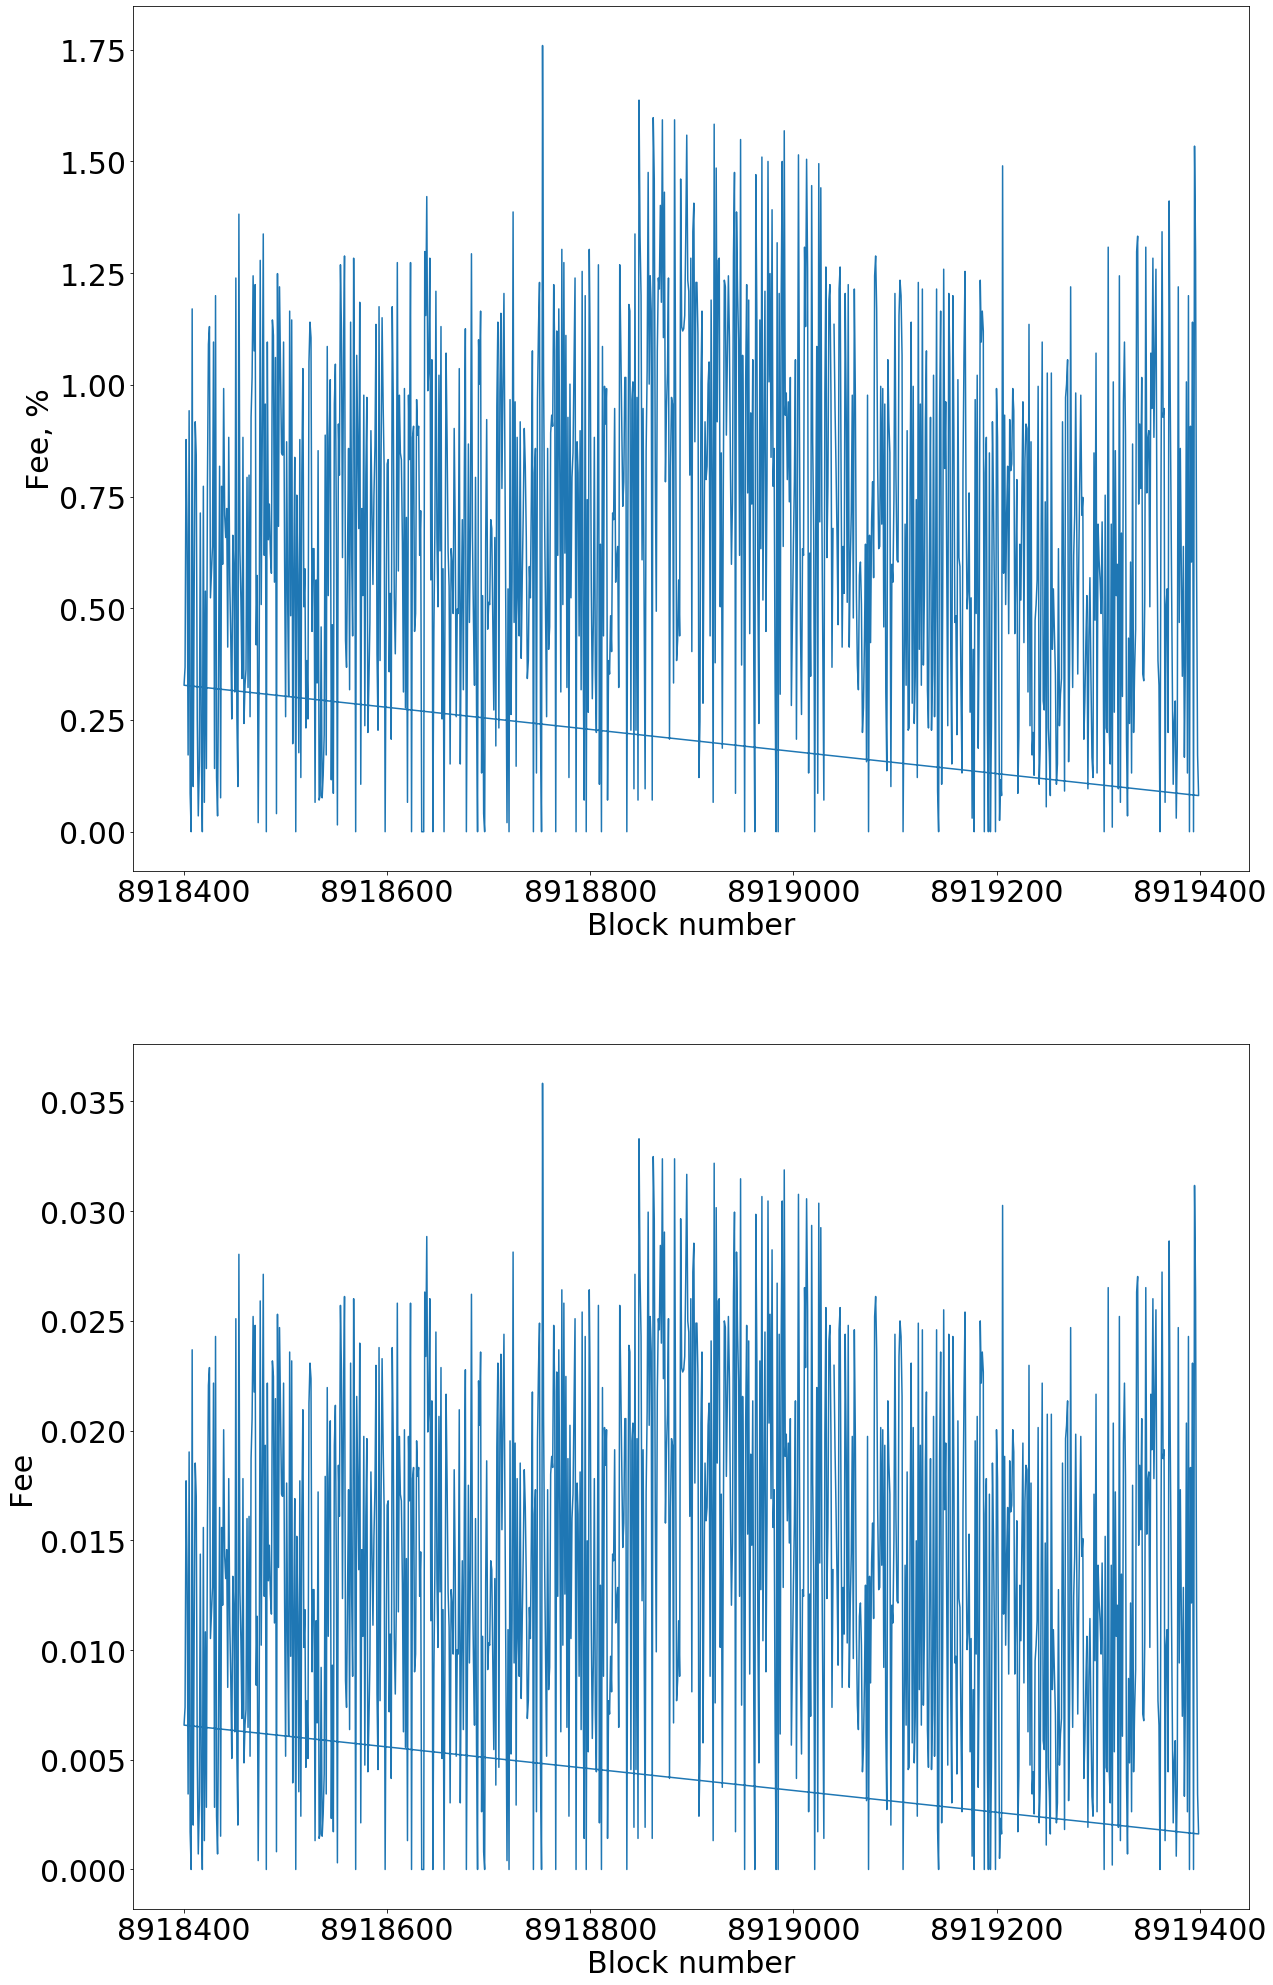

In [4]:
fig = plt.figure(figsize=(20,35))
plt.rcParams.update({'font.size': 30})

fig1 = fig.add_subplot(211)
fig1.plot(gas_data.number, gas_data.percent)
fig1.set_xlabel('Block number', )
fig1.set_ylabel('Fee, %')

fig2 = fig.add_subplot(212)
fig2.plot(gas_data.number, gas_data.block_fee)
fig2.set_xlabel('Block number', )
fig2.set_ylabel('Fee')

plt.show()

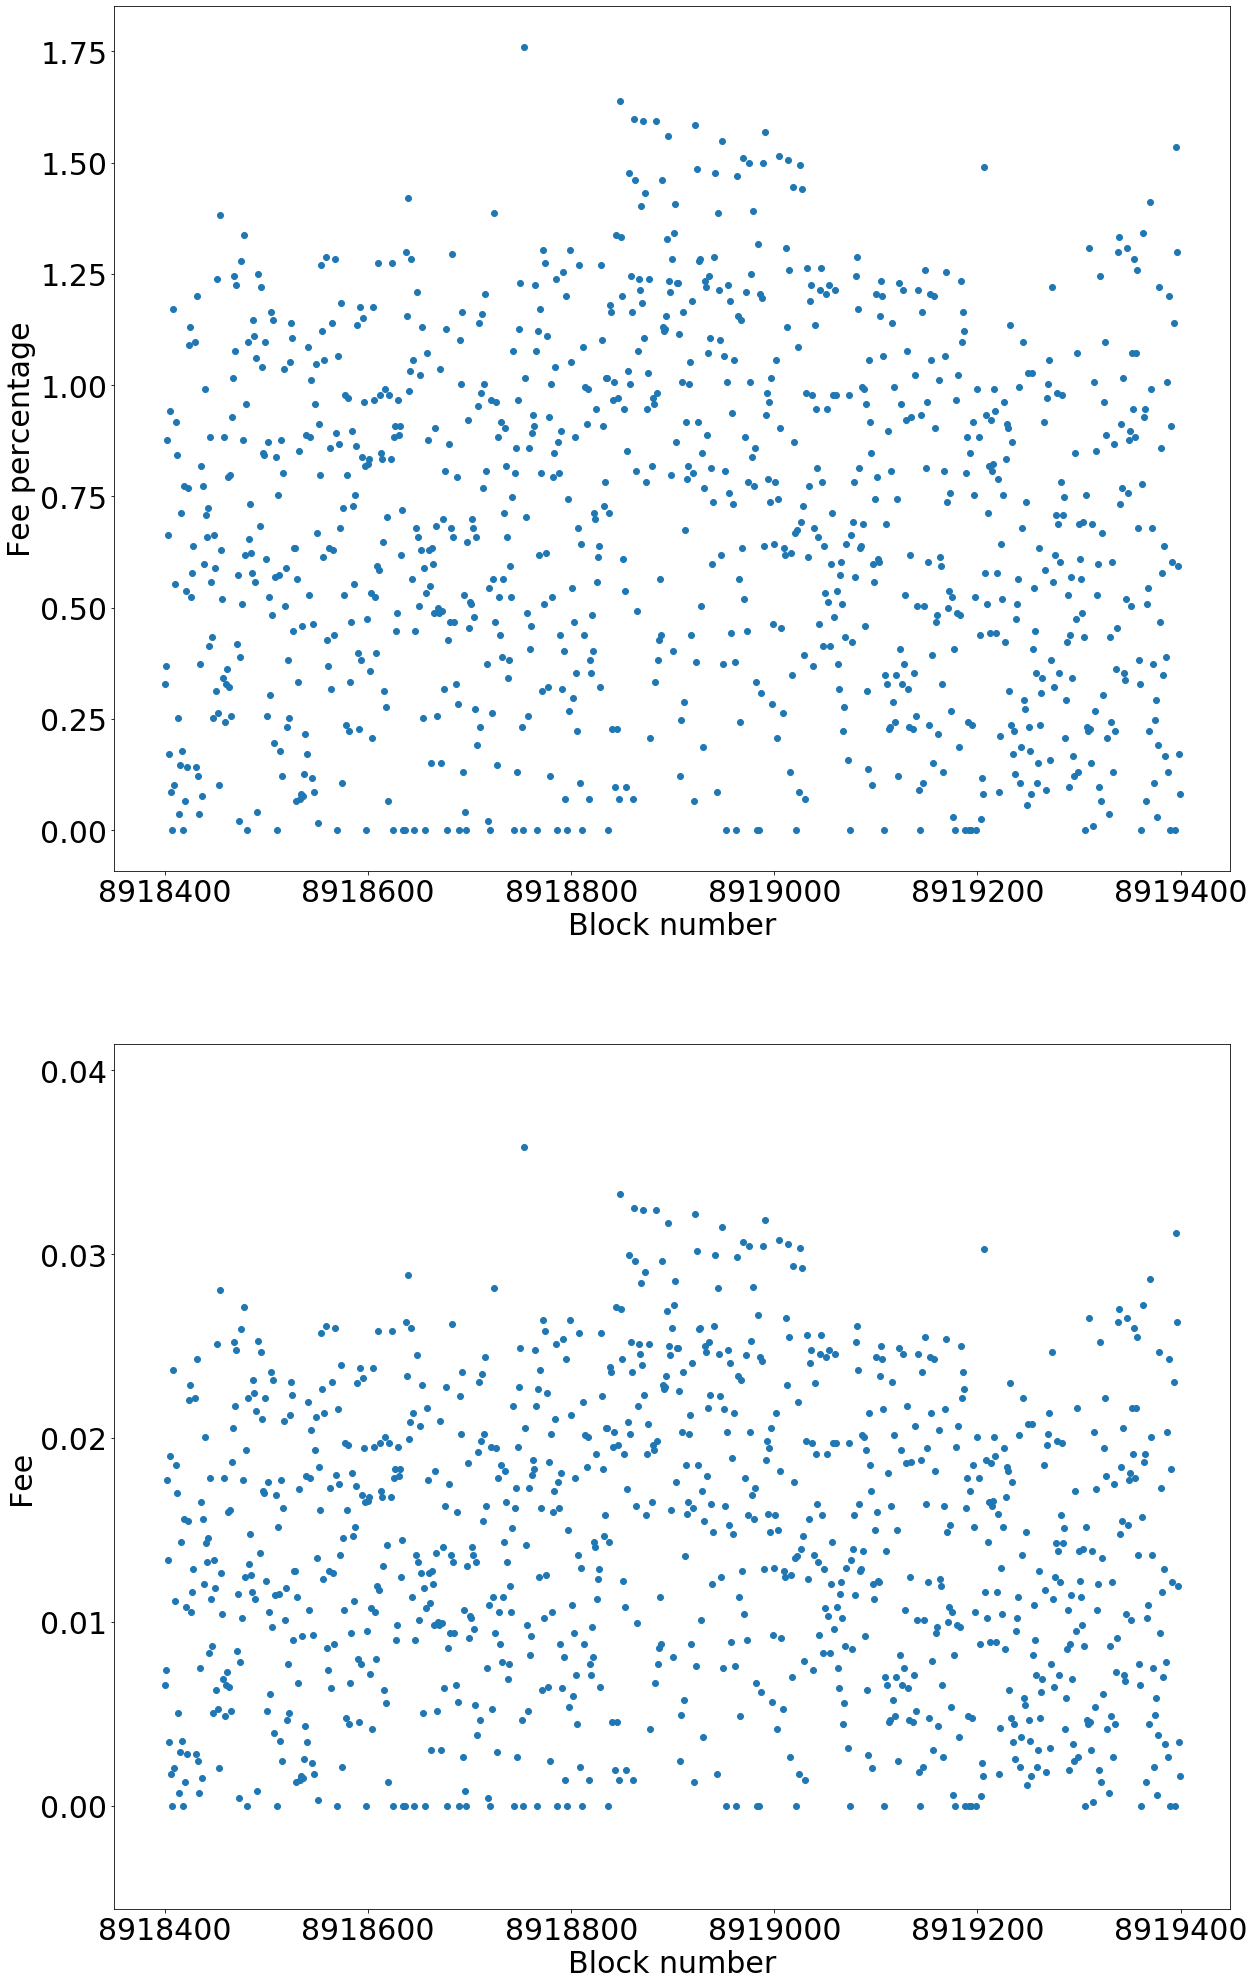

In [9]:
fig = plt.figure(figsize=(20,35))
plt.rcParams.update({'font.size': 30})

fig1 = fig.add_subplot(211)
fig1.scatter(gas_data.number, gas_data.percent)
fig1.set_xlabel('Block number', )
fig1.set_ylabel('Fee percentage')

fig2 = fig.add_subplot(212)
fig2.scatter(gas_data.number, gas_data.block_fee)
fig2.set_xlabel('Block number', )
fig2.set_ylabel('Fee')

plt.show()

### 6. Getting our extra values
#### Expected value, dispersion, median, range, std deviation, 

In [13]:
mean = np.mean(gas_data.block_fee)
dispersion = np.var(gas_data.block_fee)
std_deviation = np.std(gas_data.block_fee)
fee_range = np.ptp(np.array(gas_data.block_fee))
med = np.median(gas_data.block_fee)
print ('Expected value:', round(mean, 6))
print ('Dispersion:', round(dispersion, 9))
print ('Standard deciation:', round(std_deviation, 6))
print ('Range:', round(fee_range, 6))
print ('Median:', round(med, 6))

Expected value: 0.013867
Dispersion: 6.5311e-05
Standard deciation: 0.008082
Range: 0.03582
Median: 0.01366
